# Glass Identification Dataset

Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

    Id number: 1 to 214

    RI: refractive index

    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

    Mg: Magnesium

    Al: Aluminum

    Si: Silicon

    K: Potassium

    Ca: Calcium

    Ba: Barium

    Fe: Iron

Type of glass: (class attribute)

    1- building_windows_float_processed

    2- building_windows_non_float_processed

    3- vehicle_windows_float_processed

    4- vehicle_windows_non_float_processed (none in this database)

    5- containers

    6- tableware

    7- headlamps

There are 214 observations in the dataset. 

    The dataset can be divided into window glass (classes 1-4) 
    and non-window glass (classes 5-7). 


Predict : Type of glass

Downlaod Files:

https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv

https://github.com/dsrscientist/dataset3

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin 
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


# Dataset exploration

In [2]:
#Calculating number of null Values Belonging to each Column

print("Data set has null values True-1 or Fase-0===>",df.isnull().sum().sum())
     
#Shape of Data

df.shape

Data set has null values True-1 or Fase-0===> 0


(213, 11)

In [3]:
print(df['1.1'].unique())

[1 2 3 5 6 7]


In [4]:
# Checking Data type of Columns
df.dtypes

1            int64
1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1.1          int64
dtype: object

In [5]:
# strip whitespaces--Leading and trailing from column names 
df.columns = df.columns.str.strip()

In [6]:
df.describe() 

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Dataset doesn't have any null values and all the attributes are numerical. 

Even the type which is categorical in nature is represented as integers. 

There seems to be no order among the classes.

Mean>median==>Right Skewed-->1.10,0.00 columns but not having more deviation

Mean<median==>left Skewed-->13.64,4.49,0.06 coumsn but not having much deviation


# Exploratory Data Analyses


<AxesSubplot: xlabel='1.1', ylabel='count'>

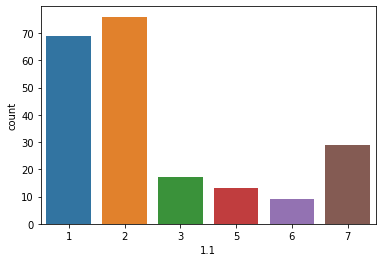

In [7]:
#Counting Number of Values Belonging to each class
df['1.1'].value_counts()
sns.countplot(x=df['1.1'], data=df)

As we can see The dataset is very very unbalanced.

The occurrences of types 1 and 2 constitute more than 67 % of the glass types.

# Data Preprocessing (Preparing Dataset)


Attribute Information-

    Id number: 1 to 214

    RI: refractive index

    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

    Mg: Magnesium

    Al: Aluminum

    Si: Silicon

    K: Potassium

    Ca: Calcium

    Ba: Barium

    Fe: Iron
Type of glass: (class attribute)

    1- building_windows_float_processed

    2- building_windows_non_float_processed

    3- vehicle_windows_float_processed

    4- vehicle_windows_non_float_processed (none in this database)

    5- containers

    6- tableware

    7- headlamps

# Add column/attribute names

In [8]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df.head() 

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Removing unnecessary columns


In [9]:
df = df.drop('Id',1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


# Statistics of Dataset

In [10]:
# Descriptive statistics
# Summarizing the distribution of the numerical variables.
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Above statistics shows that data is across all attributes is not in same range, so we will have to normalize the data first

The features are not on the same scale. I.e. Si has a mean of 72.65 while Fe has a mean value of 0.057.

Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. 

Let's go ahead and check the distribution of the glass types.

# Data Visualization

# Univariate Plots

In [11]:
# Seprating Class labels and Features

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = df[features]
y = df[label]

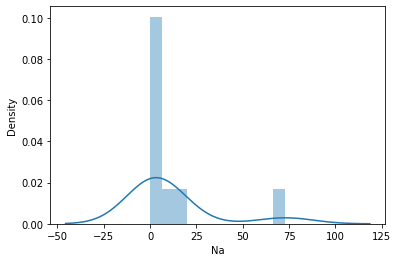

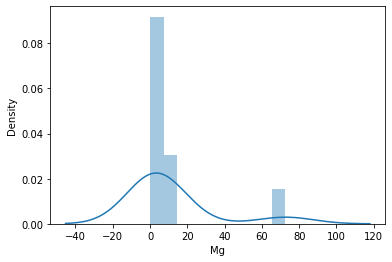

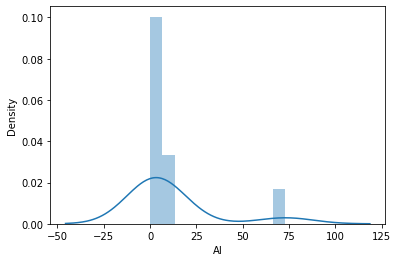

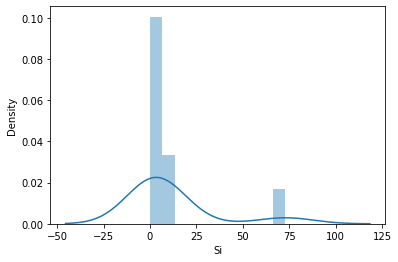

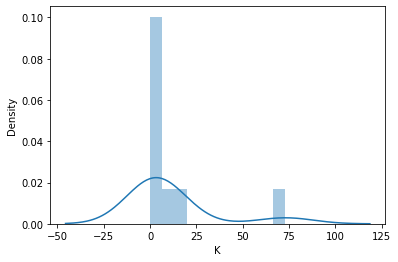

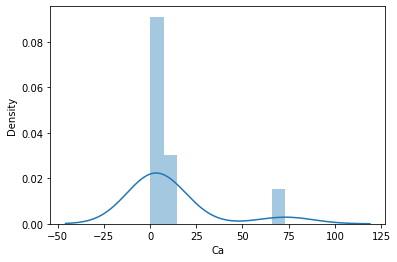

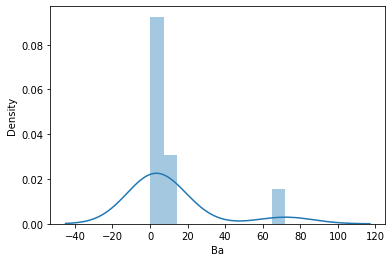

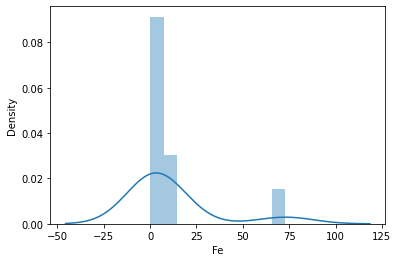

In [12]:
x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])        
        plt.show()        
     

Outcomes

Our dataset is skewed either on positive side or negative side and data is not normalized

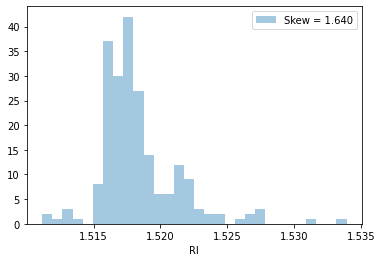

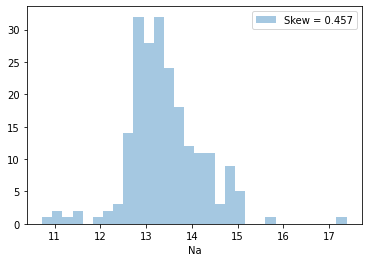

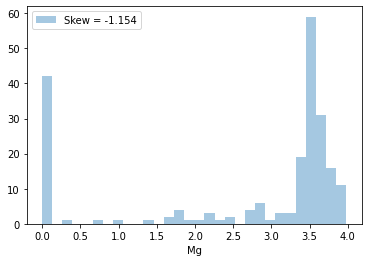

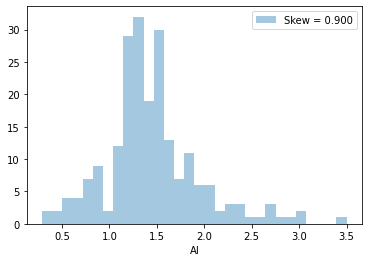

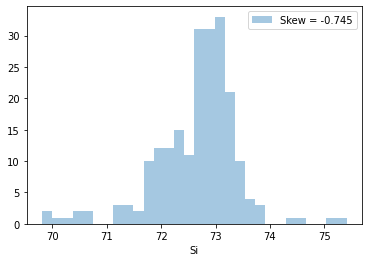

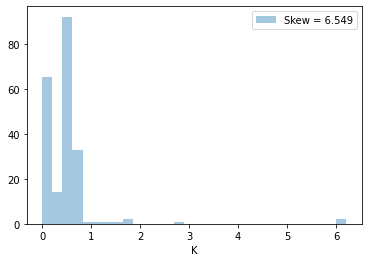

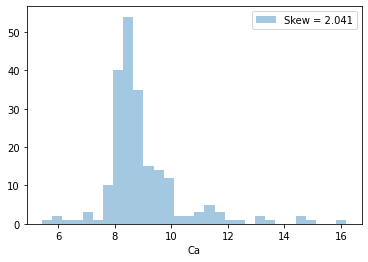

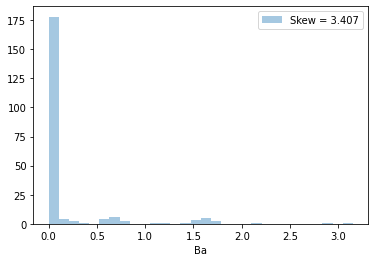

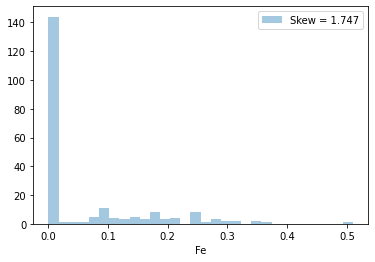

In [13]:
#more Insights about the data
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Outcomes

The distribution of potassium (K) and Barium (Ba) seem to contain many outliers.

The features Fe, Ba, Ca and K are Highly Skewed (They have High skew coefficients).

None of the features follow Normal Distribution (are not normally distributed).

# Bivariate Plots

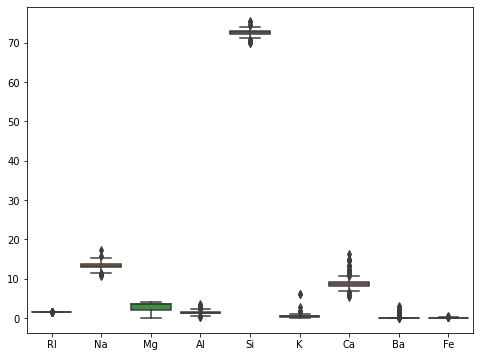

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(df[features])
plt.show()


Silicon has a mean that is much superior to the other constituents as we already saw in the previous section. 
and glass is mainly based on silica.

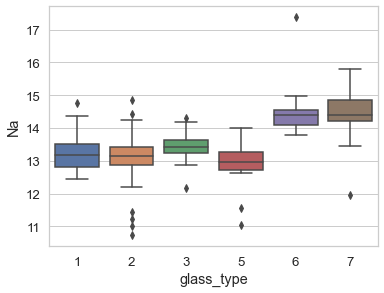

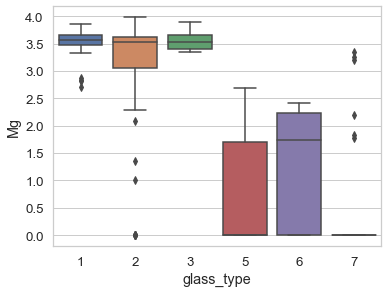

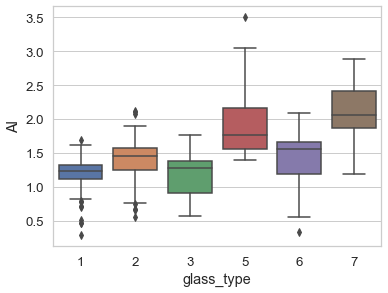

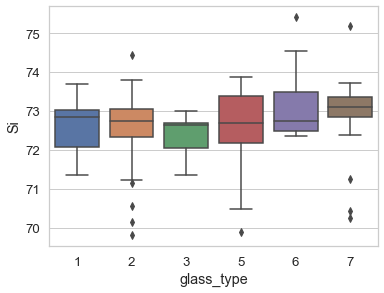

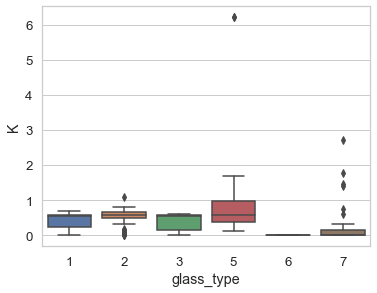

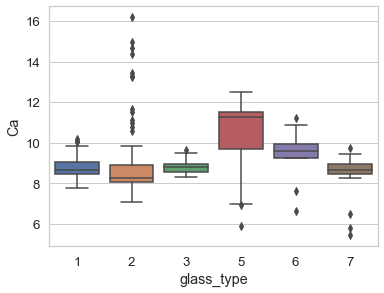

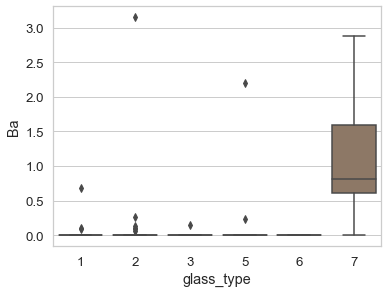

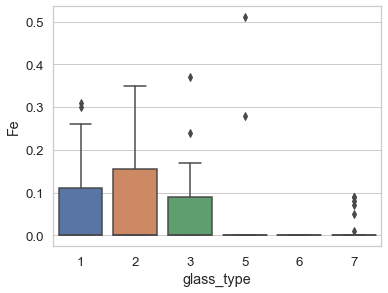

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

x2 = X.values
for i in range(1,9):
        sns.set(style="whitegrid", font_scale=1.2)
        plt.subplots(figsize = (20,15))
        plt.subplot(3,3,i)
        sns.boxplot(x=df['glass_type'], y=features[i], data=df)
        plt.show()


The box plot shows that average Refractive index is similar for all types.
Although, Type 5 has a wider range and slightly higher mean. 

Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. 

Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. 

Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. 

Calcium is highest in type 5 and Barium in type 7. Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest. 
This is because Iron is added mainly in colored glasses.

We got some idea on which feature provides more insight in differentiating one type from another. 

Now, let's see the relationship between each one of them through a pairplot. 
(We will leave out K, Ba and Fe due to sparse concentration)

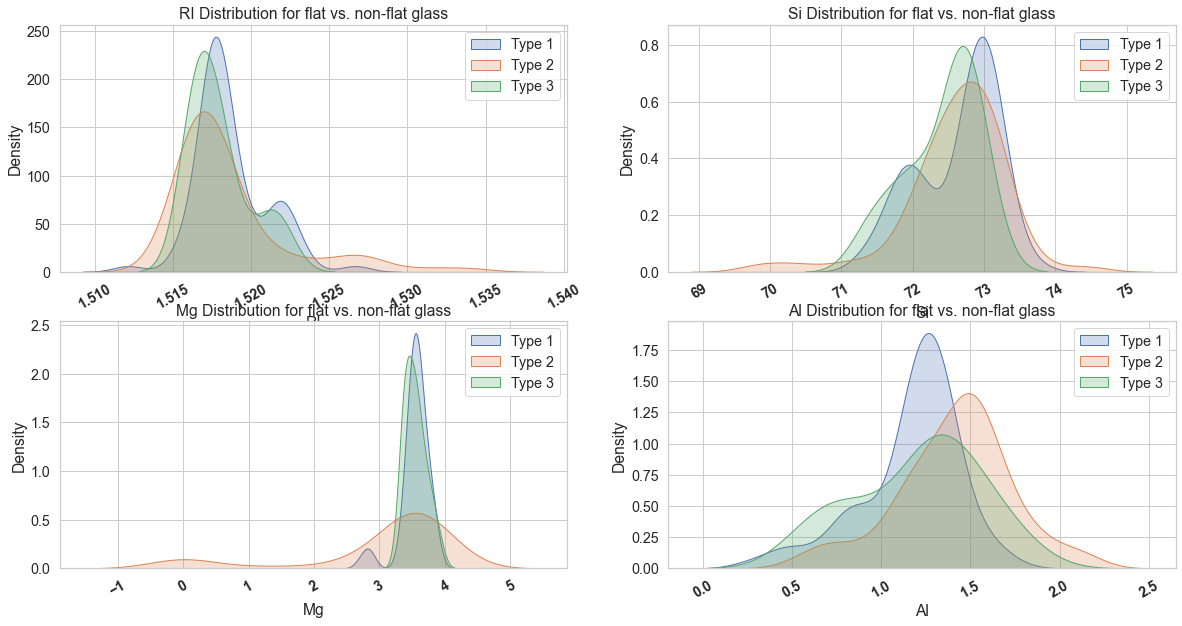

In [16]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(df["RI"][df.glass_type == 1], shade = True)
sns.kdeplot(df["RI"][df.glass_type == 2], shade = True)
sns.kdeplot(df["RI"][df.glass_type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.xticks(fontsize=14,fontweight ='bold',rotation = 30)
plt.legend(['Type 1', 'Type 2', 'Type 3'])

plt.subplot(2,2,2)
sns.kdeplot(df["Si"][df.glass_type == 1], shade = True)
sns.kdeplot(df["Si"][df.glass_type == 2], shade = True)
sns.kdeplot(df["Si"][df.glass_type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.xticks(fontsize=14,fontweight ='bold',rotation = 30)
plt.legend(['Type 1', 'Type 2', 'Type 3'])

plt.subplot(2,2,3)
sns.kdeplot(df["Mg"][df.glass_type == 1], shade = True)
sns.kdeplot(df["Mg"][df.glass_type == 2], shade = True)
sns.kdeplot(df["Mg"][df.glass_type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.xticks(fontsize=14,fontweight ='bold',rotation = 30)
plt.legend(['Type 1', 'Type 2', 'Type 3'])

plt.subplot(2,2,4)
sns.kdeplot(df["Al"][df.glass_type == 1], shade = True)
sns.kdeplot(df["Al"][df.glass_type == 2], shade = True)
sns.kdeplot(df["Al"][df.glass_type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.xticks(fontsize=14,fontweight ='bold',rotation = 30)
plt.legend(['Type 1', 'Type 2', 'Type 3'])

Mostly the flat ones (1,3) overlap on all the properties except Aluminium. Aluminium has a wider range for type 3 than type 1. 

The non-float glass, type 2 has many extreme points which make its range very high.

# Multivariate Plots

<Figure size 576x576 with 0 Axes>

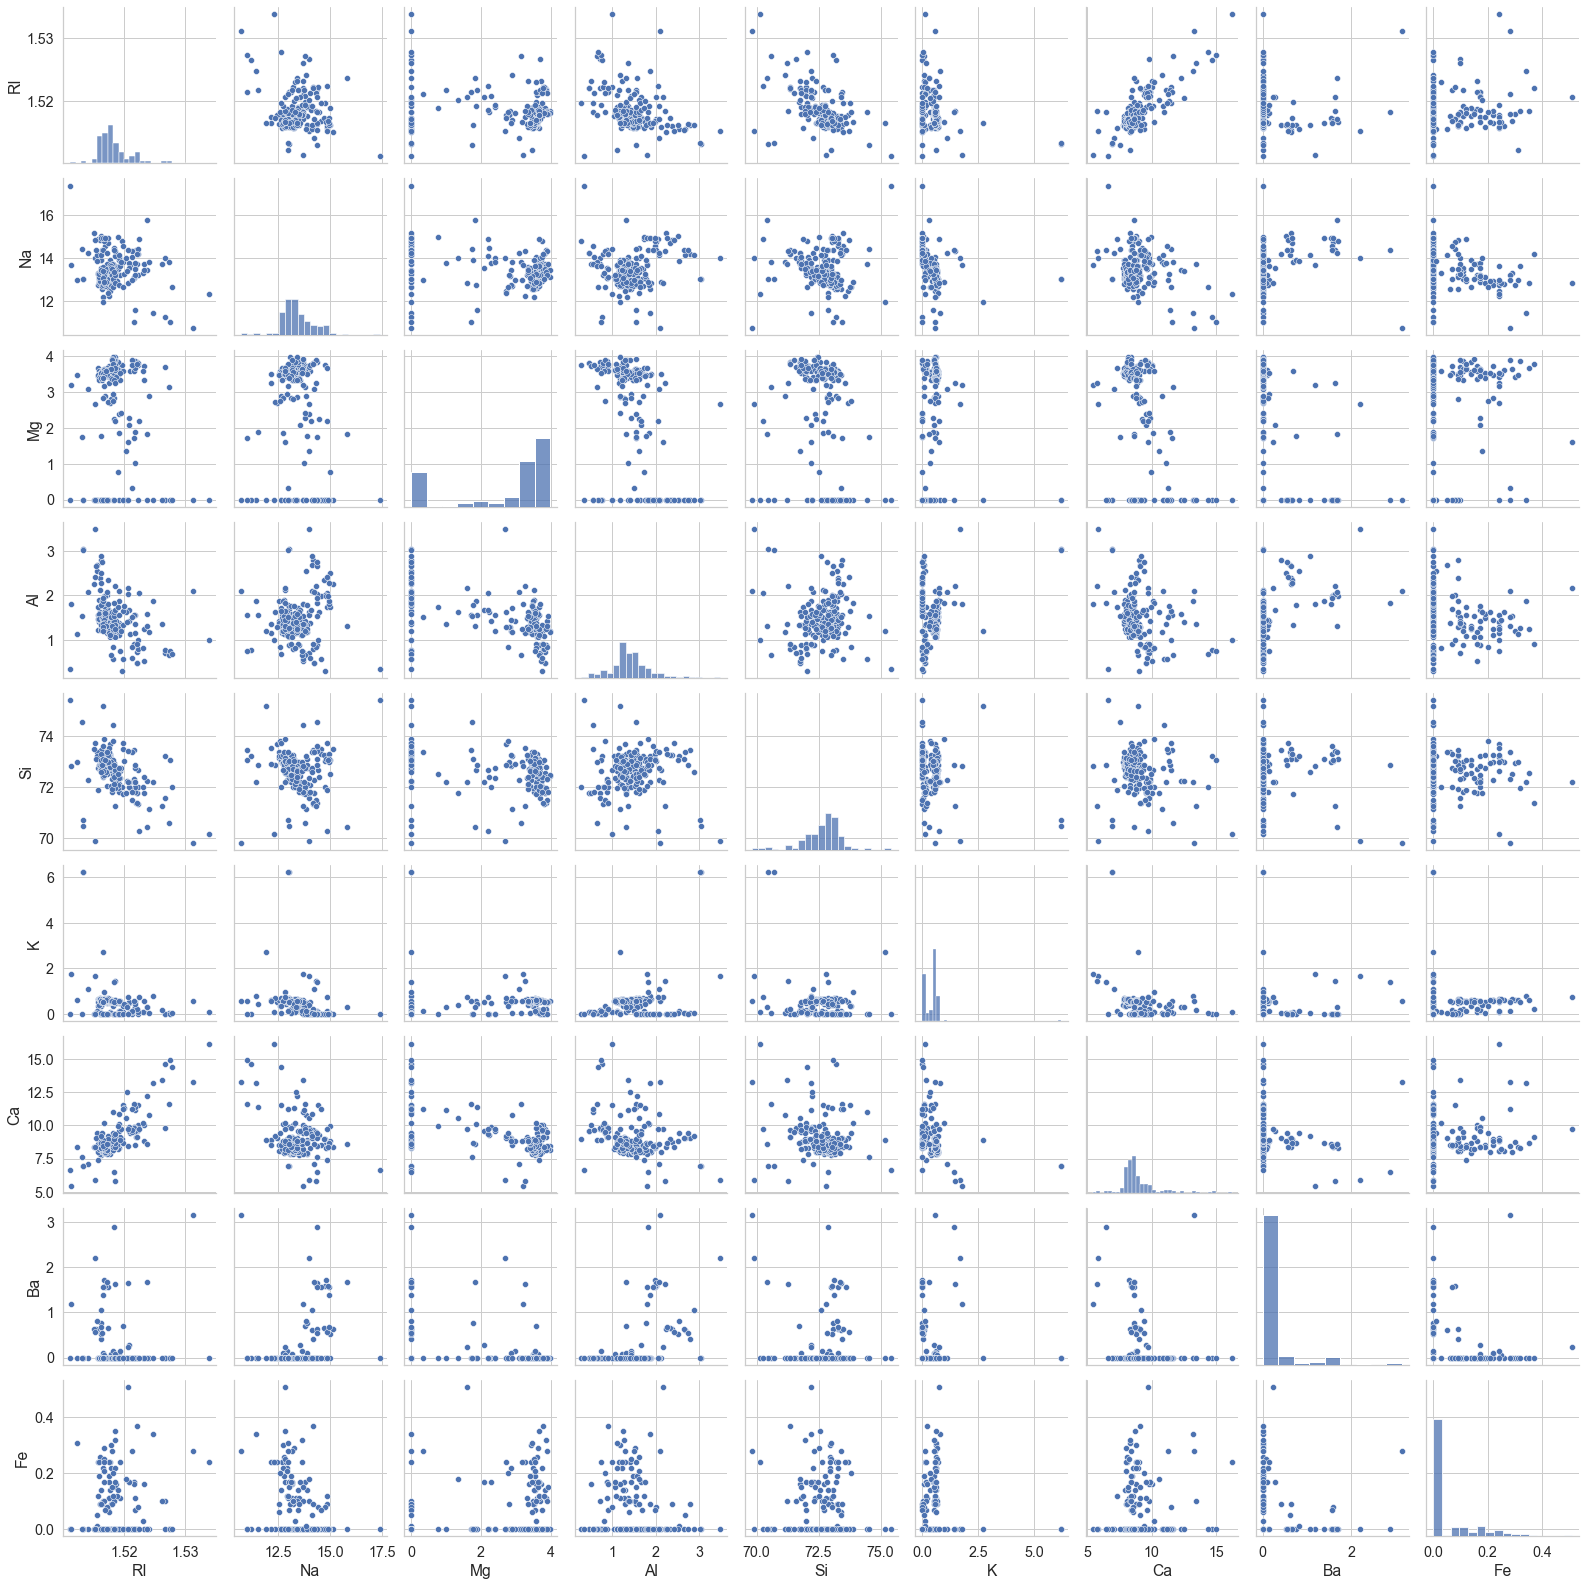

In [17]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Silica and RI seem to have an inverse relationship.

Type 1,2 & 3 have very similar properties. However, we can distinguish them based on whether they are flat or not. Basically, float process is used to flatten the glass into sheets. Let us see the density plot of flat vs non-flat glass on some of the properties.

# Correlation Matrix


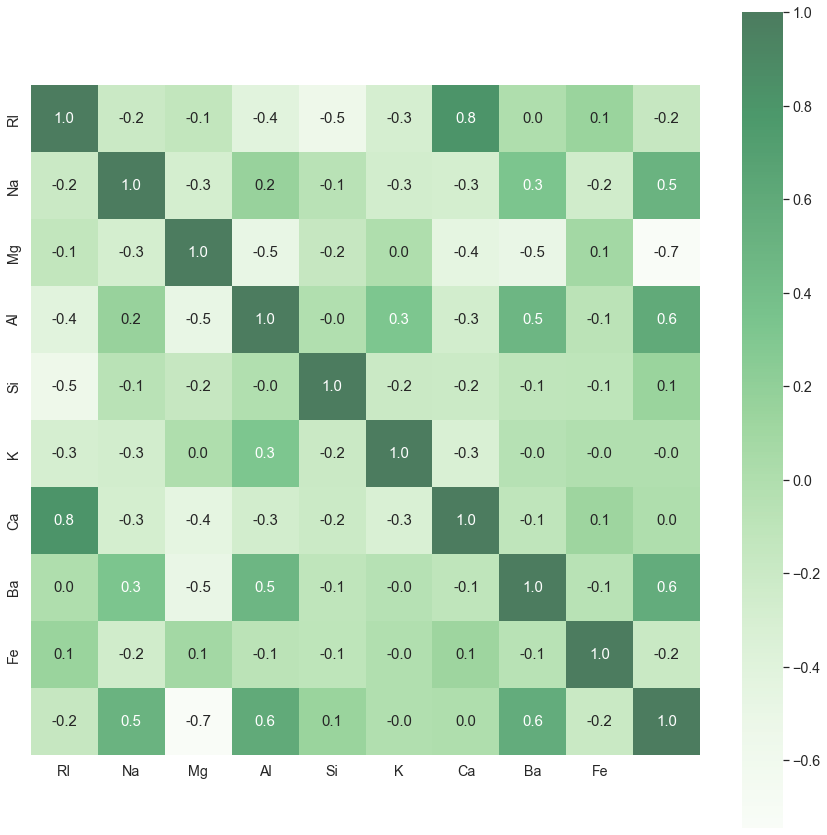

In [18]:
correlation= df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'Greens')
plt.show()

Outcomes

AI and Ba have intermediate correlation between each other.

RI and Ca have strong correlation between each other.

( We can perform MUlit collinearity and check for VIF  in order to decorrelate some of the input features. )

Text(0.5, 1.0, 'Feature correlated with galss type')

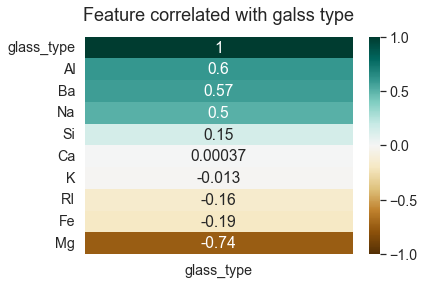

In [19]:
# plot relationship of target variable with other variables in descending order
heatmap = sns.heatmap(df.corr()[['glass_type']].sort_values(by='glass_type',ascending=False),vmin=-1,
                     vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Feature correlated with galss type',fontdict={'fontsize':18},pad=16)

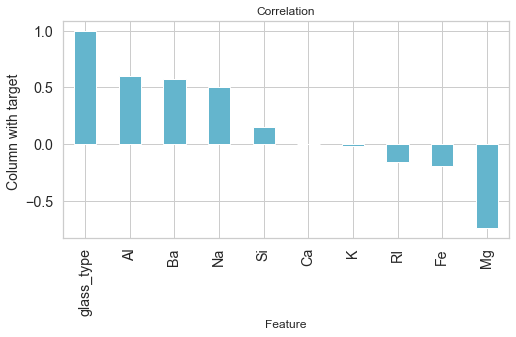

In [20]:
# Plot the relationship of target variable with other variables in descending order
plt.figure(figsize=(8,4))
correlation["glass_type"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=12)
plt.ylabel("Column with target ",fontsize=14)
plt.title("Correlation",fontsize=12)
plt.show()

Observations: 
(Correlation of Target variable with features)

Max correlation: "Mg" Typically -0.3 to +0.3 are considered as weak correlation 

however there are many columns having the relationship in this range with target variable

Get top 10 features that have strong relationship with target variable using SelectKBest algorithm and
will take a call to remove further columns 

based on the comparison between corrleation table scores Vs SelectKBest scores

# SelectKBest algorithm

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[features] # #independent columns
y = df[label]# Output variable

#SelectKBest to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  #best features

  Specs       Score
7    Ba  144.659991
2    Mg  100.413501
5     K   31.461011
3    Al   16.878718
1    Na    4.319534
6    Ca    3.206029
8    Fe    2.160581
4    Si    0.109786
0    RI    0.000047


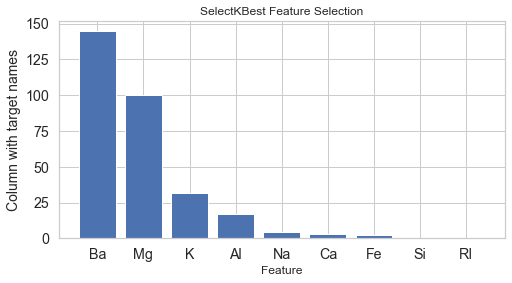

In [22]:
# Plot the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(8,4))
plt.bar('Specs','Score',data=df_sorted_desc)
plt.xlabel("Feature",fontsize=12)
plt.ylabel("Column with target names",fontsize=14)
plt.title("SelectKBest Feature Selection",fontsize=12)
plt.show()

Below features are top features but will finalize the list post checking MulitCollinearity from VIF

        Ba  
        Mg  
        K   
        Al  
        Na
        Ca
        Fe

# Outlier Detection

In [23]:
# Detect observations with more than one outlier
# Input dataframe df of features and returns a list of the indices
# corresponding to the observations containing more than 2 outliers. 

def outlier_hunt(data):  
    outlier_indices = []    
    for col in data.columns.tolist():
        Q1 = np.percentile(data[col], 25)     
        Q3 = np.percentile(data[col],75)               
        IQR = Q3 - Q1      
        outlier_step = 1.5 * IQR               
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index                
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features])))) 

The dataset contains 14 observations with more than 2 outliers


Outcomes

In our data, There exists around 14 observations with multiple outliers.

These could harm the efficiency of our learning algorithms. We'll remove them now.

# Removal of Outliers --Data Treatment

In [24]:
#Information about data in hand
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          213 non-null    float64
 1   Na          213 non-null    float64
 2   Mg          213 non-null    float64
 3   Al          213 non-null    float64
 4   Si          213 non-null    float64
 5   K           213 non-null    float64
 6   Ca          213 non-null    float64
 7   Ba          213 non-null    float64
 8   Fe          213 non-null    float64
 9   glass_type  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Outcomes

This dataset is clean; there aren't any missing values in it.

In [25]:
outlier_indices = outlier_hunt(df[features])
print(outlier_indices)
features_new = df.drop(outlier_indices).reset_index(drop=True)

print(features_new.shape)

[102, 104, 105, 106, 109, 110, 183, 184, 188, 162, 170, 171, 185, 206]
(199, 10)


In [26]:
#Dataloss=(1599-1458)/1599*100
Dataloss=(len(df)-len(features_new))/len(df)*100
Dataloss

6.572769953051644

Observations:

Data loss is less than 10% hence it is acceptable
Removing observations with multiple outliers  left us with 199 observations to train from.

In [27]:
df = features_new
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
194,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
195,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
196,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
197,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# multi-Collinearity using VIF

In [28]:
# We don't apply VIF on categorical data hence checking on continuous data
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
XX = df[features][list(df[features].columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif_info['Column'] = XX.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,736554.142382,RI
4,373206.450522,Si
1,14532.926145,Na
6,8044.018891,Ca
2,849.319773,Mg
3,182.626762,Al
5,31.198443,K
7,16.062552,Ba
8,1.535241,Fe


Observation

RI, Si, Na,Ca--Can be removed due to MultiCollinearity

Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features

As there are multiple features (5) with VIF values > 10, hence dropping column "Family" in this case as the data loss will be more due to smaller dataset

In [29]:
#  Dropping irrelevant variables based on VIF >10
df.drop(['RI','Si','Na','Ca'], axis=1,inplace=True)
df.head()

,Mg,Al,K,Ba,Fe,glass_type
0,3.60,1.36,0.48,0.0,0.00,1
1,3.55,1.54,0.39,0.0,0.00,1
2,3.69,1.29,0.57,0.0,0.00,1
3,3.62,1.24,0.55,0.0,0.00,1
4,3.61,1.62,0.64,0.0,0.26,1


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X=df[['Mg','Al','K','Ba','Fe']] 
          
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

  feature       VIF
0      Mg  4.712262
1      Al  6.472892
2       K  4.162014
3      Ba  2.200601
4      Fe  1.379087


In [31]:
display(df.head())
print(df.info())

,Mg,Al,K,Ba,Fe,glass_type
0,3.60,1.36,0.48,0.0,0.00,1
1,3.55,1.54,0.39,0.0,0.00,1
2,3.69,1.29,0.57,0.0,0.00,1
3,3.62,1.24,0.55,0.0,0.00,1
4,3.61,1.62,0.64,0.0,0.26,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mg          199 non-null    float64
 1   Al          199 non-null    float64
 2   K           199 non-null    float64
 3   Ba          199 non-null    float64
 4   Fe          199 non-null    float64
 5   glass_type  199 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.5 KB
None


# Scaling data

In [32]:
# standard scaler only on continuous data as we don't scale categorical data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df_scaled=sc.fit_transform(df)
x_continuous=pd.DataFrame(data=df_scaled)
x_continuous

,0,1,2,3,4,5
0,0.590660,-0.150066,0.163051,-0.342548,-0.595871,-0.818180
1,0.554047,0.255622,-0.133722,-0.342548,-0.595871,-0.818180
2,0.656562,-0.307833,0.459824,-0.342548,-0.595871,-0.818180
3,0.605305,-0.420524,0.393874,-0.342548,-0.595871,-0.818180
4,0.597982,0.435927,0.690647,-0.342548,2.122854,-0.818180
...,...,...,...,...,...,...
194,-2.045451,3.275742,-1.155939,2.579288,-0.595871,2.106692
195,-2.045451,1.269841,-1.419737,4.040206,-0.595871,2.106692
196,-2.045451,1.337456,-1.419737,4.178028,-0.595871,2.106692
197,-2.045451,1.157150,-1.419737,3.985077,-0.595871,2.106692


# Visualization of Data after Being Preprocessed

In [33]:
#Consider the Dataframe with outlier removals from IQR

print("Columns \n",df.columns)
print("\n")
features=df.drop("glass_type",axis=1)
#display(features)
target=df["glass_type"]
#display(target)
print(features.shape,target.shape)

Columns 
 Index(['Mg', 'Al', 'K', 'Ba', 'Fe', 'glass_type'], dtype='object')


(199, 5) (199,)


Outcomes

According to Diagrams above, After preprocessing,

Skewness is reduced.

Data is more normalized.

In [34]:
#concat two dataframes for better visualization 
new_df = pd.concat([features,target],axis=1)
display(new_df)

,Mg,Al,K,Ba,Fe,glass_type
0,3.60,1.36,0.48,0.00,0.00,1
1,3.55,1.54,0.39,0.00,0.00,1
2,3.69,1.29,0.57,0.00,0.00,1
3,3.62,1.24,0.55,0.00,0.00,1
4,3.61,1.62,0.64,0.00,0.26,1
...,...,...,...,...,...,...
194,0.00,2.88,0.08,1.06,0.00,7
195,0.00,1.99,0.00,1.59,0.00,7
196,0.00,2.02,0.00,1.64,0.00,7
197,0.00,1.94,0.00,1.57,0.00,7


# Use SMOTE to balance the data

In [35]:
print("Checking the value count of target column \n",target.value_counts())
print(features.shape,target.shape)

Checking the value count of target column 
 2    70
1    69
7    25
3    17
5    10
6     8
Name: glass_type, dtype: int64
(199, 5) (199,)


In [36]:
print(np.unique(target))

[1 2 3 5 6 7]


In [37]:
#oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
#seperating the input and output variables
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)


In [38]:
x_ros, y_ros
#features_smote = pd.DataFrame(x_ros, columns =['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
features_smote = pd.DataFrame(x_ros, columns =['Mg','Al','K','Ba','Fe'])

target_smote = pd.DataFrame(y_ros, columns =['glass_type'])
print("\nPandas DataFrame: ")
print("Post SMOTE -- value count of target column \n",target_smote.value_counts())
df_smote = pd.concat([features_smote,target_smote],axis=1)
print(df_smote.info())
df_smote.head()          



Pandas DataFrame: 
Post SMOTE -- value count of target column 
 glass_type
1             70
2             70
3             70
5             70
6             70
7             70
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mg          420 non-null    float64
 1   Al          420 non-null    float64
 2   K           420 non-null    float64
 3   Ba          420 non-null    float64
 4   Fe          420 non-null    float64
 5   glass_type  420 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.8 KB
None


,Mg,Al,K,Ba,Fe,glass_type
0,3.60,1.36,0.48,0.0,0.00,1
1,3.55,1.54,0.39,0.0,0.00,1
2,3.69,1.29,0.57,0.0,0.00,1
3,3.62,1.24,0.55,0.0,0.00,1
4,3.61,1.62,0.64,0.0,0.26,1


In [39]:
df=df_smote
print(df.shape)
df.head()

(420, 6)


,Mg,Al,K,Ba,Fe,glass_type
0,3.60,1.36,0.48,0.0,0.00,1
1,3.55,1.54,0.39,0.0,0.00,1
2,3.69,1.29,0.57,0.0,0.00,1
3,3.62,1.24,0.55,0.0,0.00,1
4,3.61,1.62,0.64,0.0,0.26,1


In [40]:
print("Columns \n",df.columns)

print("\n")
features=df.drop("glass_type",axis=1)
#display(features)
target=df["glass_type"]
#display(target)
print(features.shape,target.shape)

Columns 
 Index(['Mg', 'Al', 'K', 'Ba', 'Fe', 'glass_type'], dtype='object')


(420, 5) (420,)


In [41]:
print("Post SMOTE -- value count of target column \n",target.value_counts())

Post SMOTE -- value count of target column 
 1    70
2    70
3    70
5    70
6    70
7    70
Name: glass_type, dtype: int64


# Base Model Building

In [42]:
print(features.shape,target.shape)
# Splitting the dataset into test and training with 75% for training the model
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = .25, random_state=0)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

(420, 5) (420,)
[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [43]:
# As target variable has multple classes, we will use various classification model along with Logisitc Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()
# Find best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Data Frame random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Data Frame random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
0,60,67.619048,67.619048,0.0
15,765,68.571429,68.571429,0.0
14,745,67.619048,67.619048,0.0
13,703,71.428571,71.428571,0.0
12,698,66.666667,66.666667,0.0
11,509,67.619048,67.619048,0.0
10,484,69.523810,69.523810,0.0
9,433,70.476190,70.476190,0.0
8,298,68.571429,68.571429,0.0
7,188,68.571429,68.571429,0.0


In [44]:
# Ideal random state where training accuracy == testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
randomstate=np.array(RSN)[0]
randomstate

60

Observations:

as multiple random states give same training and testing accuarcy scores, will get the ideal random state

In [45]:
# using ideal random state---> split the data
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=randomstate)

In [46]:
# Train  model ---> check accuracy score with one best random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test)) 
print(confusion_matrix(y_test,pred_test))

0.6761904761904762
              precision    recall  f1-score   support

           1       0.42      0.55      0.48        20
           2       0.41      0.41      0.41        17
           3       0.42      0.25      0.31        20
           5       0.89      1.00      0.94        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        16

    accuracy                           0.68       105
   macro avg       0.69      0.70      0.69       105
weighted avg       0.67      0.68      0.67       105

[[11  5  4  0  0  0]
 [ 5  7  3  2  0  0]
 [10  5  5  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0 16]]


# Cross Validation for Logistic Regression

In [47]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Get optimized folds from Logistic Regression where --> cross validation score == model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation DataFrame with mulitFolds")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation DataFrame with mulitFolds


,No of Folds,Cross Validation Score,Model Score,Difference
5,7,67.619048,67.619048,0.000000
7,9,67.571179,67.619048,0.000479
4,6,66.904762,67.619048,0.007143
8,10,66.904762,67.619048,0.007143
6,8,66.867743,67.619048,0.007513
2,4,66.666667,67.619048,0.009524
1,3,66.428571,67.619048,0.011905
0,2,65.714286,67.619048,0.019048
3,5,65.476190,67.619048,0.021429


Observations:

select CV from the above table

In [48]:
# Get the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
print("Best CV:",BCV)
# Use best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,features,target,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

Best CV: 7
The CV score is: 67.61904761904762 
The accuracy score is: 67.61904761904762
Difference is: 0.0


# Few Other Classification Algorithms

In [49]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.ensemble import VotingClassifier            # VotingClassifier

estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# Define the list with all Algorithms
models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier())]
        
#empty lists
AccuracyScore=[]
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms -->train the model & --->for cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Append "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            #"classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],features,target,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Add"cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Add "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Add "Model" to the list
    

# Need dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Accuracy Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sort with difference

Model: GaussianNB()
Accuracy Score:
68.57142857142857
Confusion Matrix:
[[ 0  1 18  0  1  0]
 [ 0  6  9  2  0  0]
 [ 0  0 20  0  0  0]
 [ 0  2  0 14  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0 16]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.67      0.35      0.46        17
           3       0.43      1.00      0.60        20
           5       0.88      0.88      0.88        16
           6       0.94      1.00      0.97        16
           7       1.00      1.00      1.00        16

    accuracy                           0.69       105
   macro avg       0.65      0.70      0.65       105
weighted avg       0.62      0.69      0.62       105

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
83.80952380952381
Confusion Matrix:
[[11  4  5  0  0  0]
 [ 3 12  1  1  0  0]
 [ 3  0 17  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0

,Model,Model Accuracy Score,Cross Validation Score,Difference
0,LogisticRegression(),67.619048,67.619048,0.000000
3,KNeighborsClassifier(),80.000000,79.047619,0.009524
4,SGDClassifier(),59.047619,60.476190,0.014286
2,Decision Tree Classifier(),83.809524,85.952381,0.021429
8,GradientBoostingClassifier(),85.714286,87.857143,0.021429
7,ExtraTreesClassifier(),85.714286,88.571429,0.028571
5,SVC(),70.476190,66.428571,0.040476
6,RandomForestClassifier(),80.000000,85.952381,0.059524
9,AdaBoostClassifier(),51.428571,45.476190,0.059524
1,GaussianNB(),68.571429,61.428571,0.071429


Observations:

Based on the comparison between model score and cross validation scores for multiple models,

I have considered "GradientBoostingClassifier()" is the best model

    High Model Accuracy Score

    High Cross Validation Score
    
    Less Difference between Model & CV Score


Hyper parameter tuning will be pefromed for GradientBoostingClassifier()

# Hyper Parameter Tuning

In [50]:
from sklearn.ensemble import GradientBoostingClassifier 
# Hyper parameter tuning on GradientBoostingClassifier()
from sklearn.model_selection import GridSearchCV
parameters = {
            "loss":["deviance","exponential"],
            "learning_rate": [0.01,0.2],
            "min_samples_split": [0.1, 0.5],
            "min_samples_leaf": [0.1, 0.5],
            "max_depth":[3,5],
            "max_features":["log2","sqrt"],
            "criterion": ["squared_error"],
            "subsample":[0.5,1.0],
            "n_estimators":[50]
            }

GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=BCV)
GCV.fit(x_train, y_train)
GCV.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 50,
 'subsample': 0.5}

In [51]:
# GradientBosstClassifier with best parameters
GBC = GradientBoostingClassifier(loss = GCV.best_params_['loss'], 
                           learning_rate=GCV.best_params_['learning_rate'],
                           min_samples_split=GCV.best_params_['min_samples_split'],
                           min_samples_leaf = GCV.best_params_['min_samples_leaf'],
                           max_depth=GCV.best_params_['max_depth'],
                           max_features=GCV.best_params_['max_features'], 
                           criterion=GCV.best_params_['criterion'],
                           subsample=GCV.best_params_['subsample'],
                           n_estimators=GCV.best_params_['n_estimators']
                           )                                      
                                     

GBC.fit(x_train, y_train)
Y_prediction = GBC.predict(x_test)
GBC_score = GBC.score(x_train, y_train)
print("GBC_score:", round(GBC_score, 4)*100, "%")

pred=GBC.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy score--> \n",acc*100)
print()
print("ConfusionMatrix--> \n",confusion_matrix(y_test,pred))
print()
print("classification_report--> \n",classification_report(y_test,pred))

score=cross_val_score(GBC,features,target,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print()
print("Difference of Accuracy & CV is:",accuracy_score(y_test,pred)-score)

GBC_score: 77.46 %
Accuracy score--> 
 70.47619047619048

ConfusionMatrix--> 
 [[12  1  7  0  0  0]
 [ 7  5  2  2  0  1]
 [ 9  0 11  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 14  2]
 [ 0  0  0  0  0 16]]

classification_report--> 
               precision    recall  f1-score   support

           1       0.43      0.60      0.50        20
           2       0.83      0.29      0.43        17
           3       0.55      0.55      0.55        20
           5       0.89      1.00      0.94        16
           6       1.00      0.88      0.93        16
           7       0.84      1.00      0.91        16

    accuracy                           0.70       105
   macro avg       0.76      0.72      0.71       105
weighted avg       0.74      0.70      0.70       105

The CV score is: 71.42857142857143 
The accuracy score is: 70.47619047619048

Difference of Accuracy & CV is: -0.00952380952380949


Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is--->-0.0095

Model with default parameters: The difference between Cross Validation Score and model score is 0.021429
    
As difference is less in the model with default parameters and more accuracy & CV Score

We will consider the Gradient Boosting model with default parameters

# AUC ROC Curve

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve--->is a performance measurement for the classification problems.For multiclass problems, ROC curves can be plotted with the methodology of using one class versus the rest. 

Use this one-versus-rest for each class and you will have the same number of curves as classes.
The AUC score can also be calculated for each class individually.

Ref
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#:~:text=The%20Receiver%20Operator%20Characteristic%20

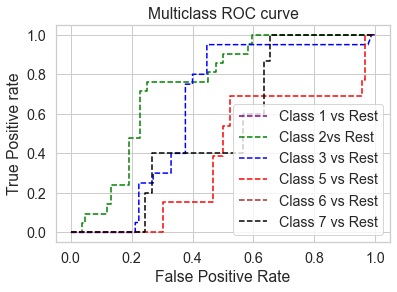

In [52]:
# Method 1 : multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

#lr=LogisticRegression()  
#model=ExtraTreesClassifier()
model=GradientBoostingClassifier()



# generate 6 classes dataset
X, y = make_classification(n_samples=199, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# fit model
clf = OneVsRestClassifier(model)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 6
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='purple', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 5 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='brown', label='Class 6 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')



Ref :https://medium.com/swlh/how-to-create-an-auc-roc-plot-for-a-multiclass-model-9e13838dd3de

(420, 5) (420,)


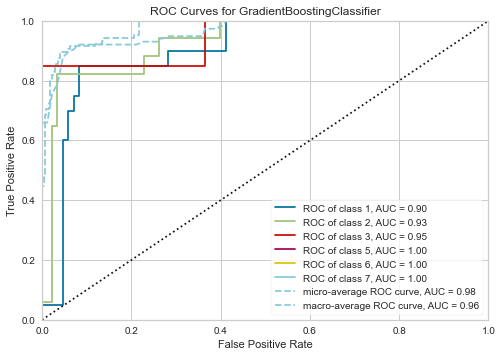

<AxesSubplot: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
#Method2 :MultiClass ROC plot with yellowbrick
#!pip install yellowbrick

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier 

from yellowbrick.classifier import ROCAUC
X=df.drop("glass_type",axis=1)
y=df["glass_type"]
print(X.shape,y.shape)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

# Instaniate the classification model and visualizer
model = GradientBoostingClassifier()
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [54]:
glass_type_check = [[3.60,1.36,0.48,0.00,0.00]]
#Print Prediction of Gradient Boosting Classifier model
pred = models[7][1].predict(glass_type_check)
print("Predicted Glass Type with 1..7 classes is ",pred)


Predicted Glass Type with 1..7 classes is  [1]


# Saving the Model

In [55]:
import pickle
file = 'GlassIdentification'
#gradient Boosting Classfier
save = pickle.dump(models[7][1],open('GlassIdentification.pkl','wb'))

# Conclusion

In [56]:
pickl_GlassIdentification = pickle.load(open('GlassIdentification.pkl','rb'))
score=pickl_GlassIdentification.score(x_test,y_test)
print(score)

conclusion=pd.DataFrame([pickl_GlassIdentification.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion.T

0.8571428571428571


,Predicted,Original
0,2,2
1,2,1
2,2,2
3,3,1
4,3,3
...,...,...
100,6,6
101,5,5
102,1,2
103,6,6
